https://causal-learn.readthedocs.io/en/latest/index.html

In [1]:
!pip install cdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 KB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=93a2d19ee7717b353acdb5e5c428955f185127490b7c13811cd9d3a1cfd4f9bc
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=82fa40abeee2e18e945ea58097b237db9ad21ed9e7844705b9bc22fe26a5c411
  Stored in directory: /root/.cache/pip/wheels/1e/93/22/f83048fc1dafedcec44bb4ccf8d08225da96d20115d97a7a77
Successfully built GPUtil skrebate


In [2]:
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 KB 13.6 MB/s eta 0:00:00


https://github.com/py-why/causal-learn

https://github.com/py-why/causal-learn/tree/main/tests

PC algorithm : https://causal-learn.readthedocs.io/en/latest/search_methods_index/Constraint-based%20causal%20discovery%20methods/PC.html

**PC algorithm** for causal discovery: **make use of conditional independence to discover the causal graph model**.

In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/sachs.txt',sep='\t')
data

,Raf,Mek,Plcg,PIP2,PIP3,Erk,Akt,PKA,PKC,P38,Jnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.00,414.0,17.00,44.9,40.00
1,35.9,16.5,12.30,16.80,8.13,18.60,32.50,352.0,3.37,16.5,61.50
2,59.4,44.1,14.60,10.20,13.00,14.90,32.50,403.0,11.40,31.9,19.50
3,73.0,82.8,23.10,13.50,1.29,5.83,11.80,528.0,13.70,28.6,23.10
4,33.7,19.8,5.19,9.73,24.80,21.10,46.10,305.0,4.66,25.7,81.30
...,...,...,...,...,...,...,...,...,...,...,...
848,42.2,27.6,21.50,67.90,12.30,8.28,15.80,562.0,21.90,29.7,8.28
849,62.1,21.7,9.56,6.49,34.30,15.30,23.10,319.0,11.90,35.5,50.90
850,103.0,32.2,10.20,13.20,50.90,5.28,5.62,239.0,14.50,22.9,5.23
851,77.7,23.7,24.80,60.40,44.50,21.50,25.00,289.0,32.20,83.5,27.10


In [4]:
from causallearn.search.ConstraintBased.PC import pc

# default parameters
cg = pc(data.values)

  0%|          | 0/11 [00:00<?, ?it/s]

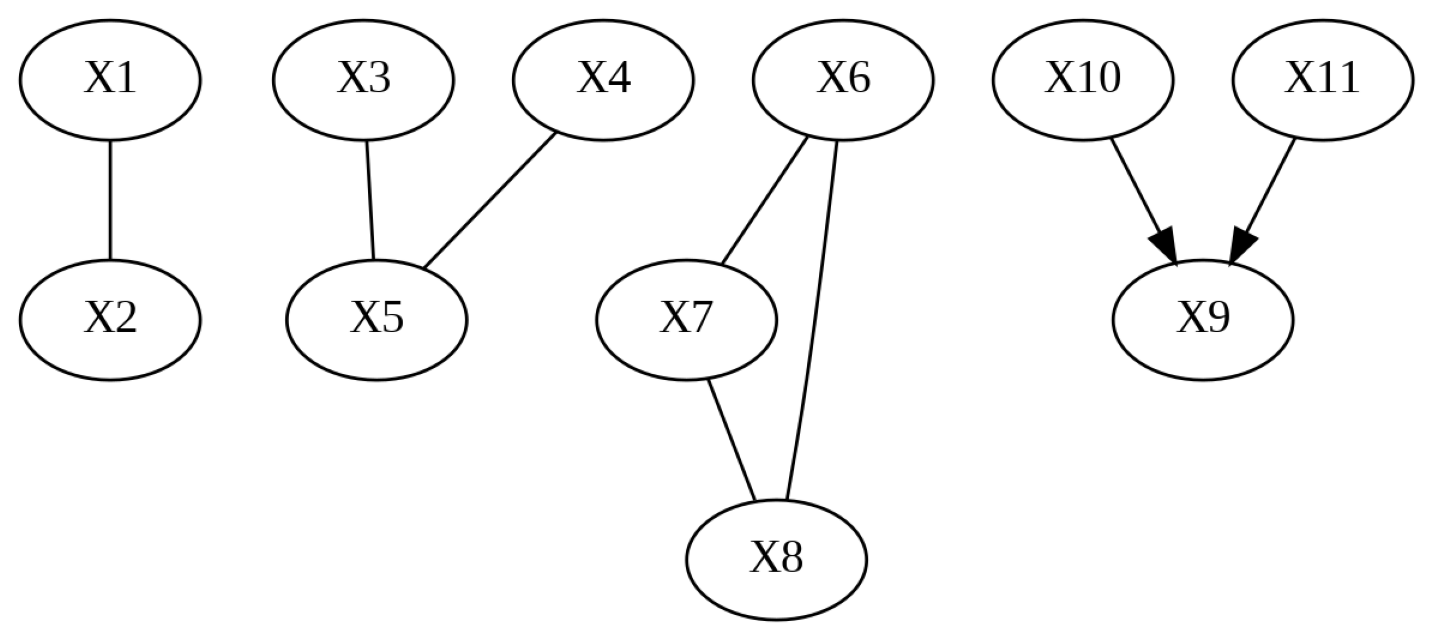

In [6]:
# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
# from causallearn.utils.GraphUtils import GraphUtils

# pyd = GraphUtils.to_pydot(cg.G)
# pyd.write_png('simple_test.png')

Lingam : https://causal-learn.readthedocs.io/en/latest/search_methods_index/Causal%20discovery%20methods%20based%20on%20constrained%20functional%20causal%20models/lingam.html#lingam

Estimation of **Linear, Non-Gaussian Acyclic causal Model** from observed data. It assumes **non-Gaussianity of the noise terms** in the causal model.

In [ ]:
!pip install lingam

In [8]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.22.4', '1.3.5', '0.10.1', '1.7.1']


In [9]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,1.657947,12.090323,3.519873,0.543405,10.182785,7.401408
1,1.217345,7.607388,1.693219,0.278369,8.758949,4.912979
2,2.226804,13.483555,3.201513,0.424518,15.398626,9.098729
3,2.756527,20.654225,6.037873,0.844776,16.795156,11.147294
4,0.319283,3.340782,0.727265,0.004719,2.343100,2.037974


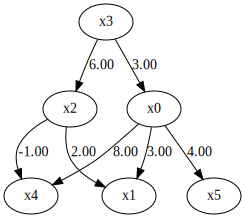

In [10]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

dot = make_dot(m)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

In [11]:
model = lingam.DirectLiNGAM()
model.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

In [12]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  2.994,  0.   ,  0.   ],
       [ 2.995,  0.   ,  1.993,  0.   ,  0.   ,  0.   ],
       [ 0.06 ,  0.   ,  0.   ,  5.776,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.981,  0.   , -0.996,  0.   ,  0.   ,  0.   ],
       [ 3.887,  0.   ,  0.   ,  0.   ,  0.015,  0.   ]])

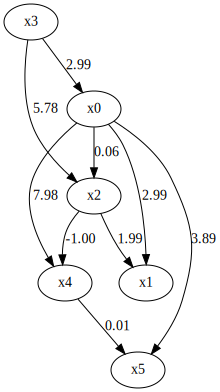

In [13]:
make_dot(model.adjacency_matrix_)

In [14]:
model.causal_order_

[3, 0, 2, 1, 4, 5]